<a href="https://colab.research.google.com/github/LauPeiTong/megaminds-travel-insurance/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel("/content/[MASA Hackathon 2022] Travel Insurance Data Set .xlsx")

In [ ]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


Based on the table shown above, the dataset is in tabular format

In [ ]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [ ]:
df.isnull()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
63321,False,False,False,False,False,False,False,False,False,False,False
63322,False,False,False,False,False,False,False,False,False,False,False
63323,False,False,False,False,False,False,False,False,False,False,False
63324,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [ ]:
a = ((df['Gender'].isna().sum())/len(df["Gender"])) * 100
print("Percentage of null values Gender variables is ", a, "%")

Percentage of null values Gender variables is  71.22982661150239 %


In [ ]:
df["Gender"].fillna("No Gender", inplace = True)
 
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,No Gender,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,No Gender,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,No Gender,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [ ]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Unique elements of',key,'are: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

Unique elements of Agency are: 
['CBH' 'CWT' 'JZI' 'KML' 'EPX' 'C2B' 'JWT' 'RAB' 'SSI' 'ART' 'CSR' 'CCR'
 'ADM' 'LWC' 'TTW' 'TST']

Unique elements of Agency Type are: 
['Travel Agency' 'Airlines']

Unique elements of Distribution Channel are: 
['Offline' 'Online']

Unique elements of Product Name are: 
['Comprehensive Plan' 'Rental Vehicle Excess Insurance' 'Value Plan'
 'Basic Plan' 'Premier Plan' '2 way Comprehensive Plan' 'Bronze Plan'
 'Silver Plan' 'Annual Silver Plan' 'Cancellation Plan'
 '1 way Comprehensive Plan' 'Ticket Protector' '24 Protect' 'Gold Plan'
 'Annual Gold Plan' 'Single Trip Travel Protect Silver'
 'Individual Comprehensive Plan' 'Spouse or Parents Comprehensive Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Child Comprehensive Plan'
 'Travel Cruise Protect' 'Travel Cruise Protect Family']

Unique elements of Claim are: 
['No' 'Yes']

Un

In [ ]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Total Unique elements of',key,'are: ')
    print(len(df[key].unique()),end='\n')
    print(end='\n')

Total Unique elements of Agency are: 
16

Total Unique elements of Agency Type are: 
2

Total Unique elements of Distribution Channel are: 
2

Total Unique elements of Product Name are: 
26

Total Unique elements of Claim are: 
2

Total Unique elements of Destination are: 
149

Total Unique elements of Gender are: 
3



5 Features as of now. Target Variable : Claim Status

Agency, Product Name and Destination are the unique variables. Reason:  not repetitive.

In [ ]:
df1 = df.groupby(by=["Destination"]).size().reset_index(name="counts")
df1.nlargest(15,['counts'])
df1['DestinationNew'] = np.where(df1['counts']>1090, df1['Destination'], 'Others')
fig = px.pie(df1, values='counts', names='DestinationNew', title='Popular Destinations among insured')
fig.show()

Singapore is the most popular destination being insured

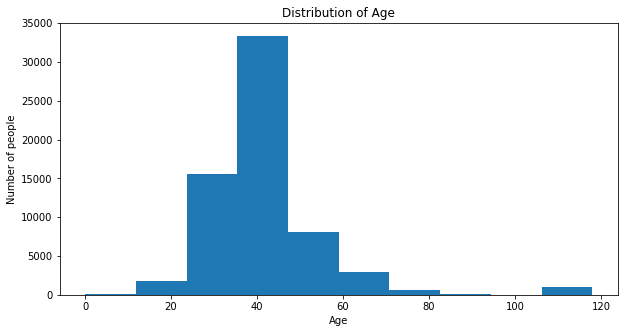

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of Age")
plt.show()

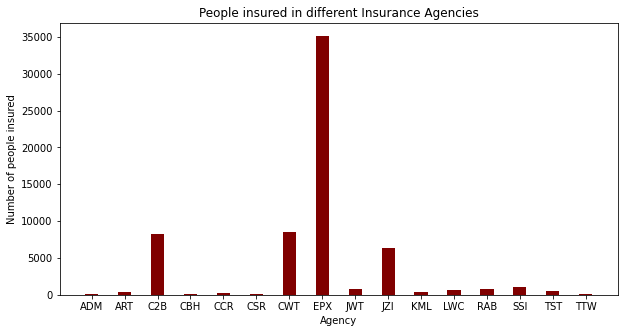

In [ ]:
df2 = df.groupby(by=["Agency"]).size().reset_index(name="counts")
fig = plt.figure(figsize = (10, 5))
plt.bar(df2['Agency'], df2['counts'], color ='maroon')
plt.xlabel("Agency")
plt.ylabel("Number of people insured")
plt.title("People insured in different Insurance Agencies")
plt.show()

EPX has the highest number of people buying their insurance

In [ ]:
df3 = df.groupby(by=["Product Name"]).size().reset_index(name="counts")
fig = px.pie(df3, values='counts', names='Product Name', title='People insured under different plans')
fig.show()

Most people sign up for 2 way Comprehensive Plan

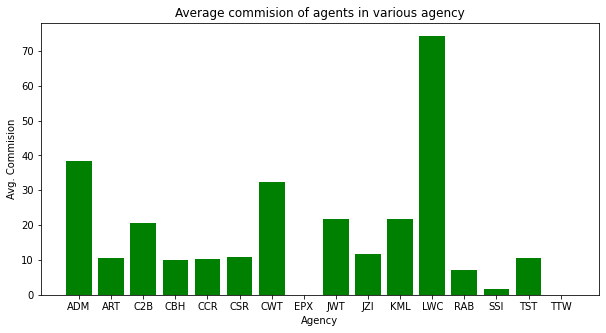

In [ ]:
df4=df.groupby(by=['Agency']).mean().reset_index()
df4.head()
fig = plt.figure(figsize = (10, 5))
plt.bar(df4['Agency'], df4['Commision (in value)'], color ='green')
plt.xlabel("Agency")
plt.ylabel("Avg. Commision")
plt.title("Average commision of agents in various agency")
plt.show()

LWC Agents receive the highest number of commision

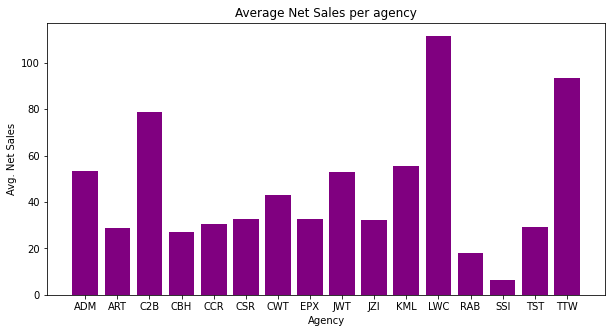

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df4['Agency'], df4['Net Sales'], color ='purple')
plt.xlabel("Agency")
plt.ylabel("Avg. Net Sales")
plt.title("Average Net Sales per agency")
plt.show()

LWC agency has the highest net sales

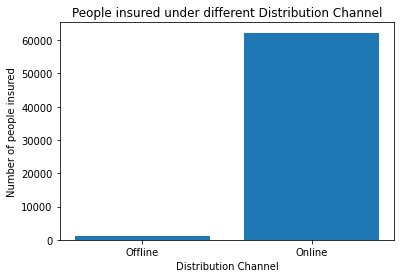

In [ ]:
df5=df.groupby(by=['Distribution Channel']).size().reset_index(name="counts")
plt.bar(df5['Distribution Channel'], df5['counts'])
plt.xlabel("Distribution Channel")
plt.ylabel("Number of people insured")
plt.title("People insured under different Distribution Channel")
plt.show()

Most people prefer Online Distribution Channel

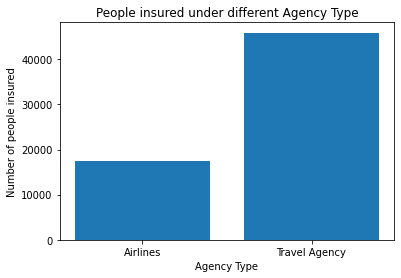

In [ ]:
df13=df.groupby(by=['Agency Type']).size().reset_index(name="counts")
plt.bar(df13['Agency Type'], df13['counts'])
plt.xlabel("Agency Type")
plt.ylabel("Number of people insured")
plt.title("People insured under different Agency Type")
plt.show()

Most people prefer to sign up for an insurance through travel agency

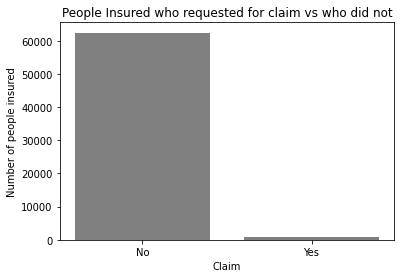

In [ ]:
df14 = df.groupby(by=["Claim"]).size().reset_index(name="counts")
plt.bar(df14['Claim'], df14['counts'], color ='grey')
plt.xlabel("Claim")
plt.ylabel("Number of people insured")
plt.title("People Insured who requested for claim vs who did not")
plt.show()

Majority did not request claim for insurance

In [ ]:
df6=df.loc[df['Claim']=='Yes']
df7= df6.groupby(by=["Destination"]).size().reset_index(name="counts")
df8=df7.nlargest(5,['counts'])
fig = px.pie(df8, values='counts', names='Destination', title='Number of Claims')
fig.show()

Singapore has the highest number of claims

In [ ]:
df9= df6.groupby(by=["Product Name"]).size().reset_index(name="counts")
df10=df9.nlargest(5,['counts'])
fig = px.pie(df10['Product Name'], values=df10["counts"], names='Product Name', title='Number of Claims')
fig.show()

Bronze Plan receive the highest number of claims

In [ ]:
df11= df6.groupby(by=["Agency"]).size().reset_index(name="counts")
df12=df11.nlargest(5,['counts'])
fig = px.pie(df12['Agency'], values=df12["counts"], names='Agency', title='Number of Claims')
fig.show()

C2B agency has the highest number of claims